In my questions, I aim to explore the relationship between the number of close/casual friends an individual has and the emotional/social well-being associated. Does having more friends or a larger social network necessarily mean that you will be happier, or is it the opposite? Is there a certain threshold for a certain amount of friends, where any point after that leads to a decline in social well-being/ life satisfaction? what role do friends play in one's mental well-being?

here are 3 questions that i prepared which relates to this topic.

Question 1: How does the number of close friends affect an individual's confidence in the availability of social support from others?

variables used: 
1. 	CONNECTION_social_num_close_friends_grouped ('How many close friends do you have?')

Description: This variable represents how many close friends an individual has.
Suggested Visualization: A bar plot showing the mean confidence score for each category of close friends. This visualization will help illustrate how confidence varies with the number of close friends.

2. PSYCH_attachment_style_questionnaire_secure_confident ('Please respond to the following items using the scale provided - I feel confident that other people will be there for me when I need them')

Description: This variable assesses how confident individuals feel that others will be there for them when needed, measured through a questionnaire.
Suggested Visualization: A bar plot of the mean confidence score against the number of close friends, including error bars to indicate variability. This will effectively convey the relationship between the number of close friends and confidence in social support.

Selected Method: I will use a bar plot to visualize the relationship between the number of close friends and confidence in social support. 
Assumptions: that the number of close friends is an independent variable.

Null Hypothesis (H0): There is no significant relationship between the number of close friends and confidence in social support.

Alternative Hypothesis (H1): There is a significant relationship between the number of close friends and confidence in social support, suggesting that an increase in close friends leads to increased confidence in social support up to a certain point.

funny enough, there is a decline in confidence after any further increases in number of close friends after 4...

/tmp/ipykernel_85/1592863846.py:8: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)
/tmp/ipykernel_85/1592863846.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='close_friends_num', y='mean', data=grouped_stats, errorbar='sd', palette='viridis', ci=None)
/tmp/ipykernel_85/1592863846.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='close_friends_num', y='mean', data=grouped_stats, errorbar='sd', palette='viridis', ci=None)


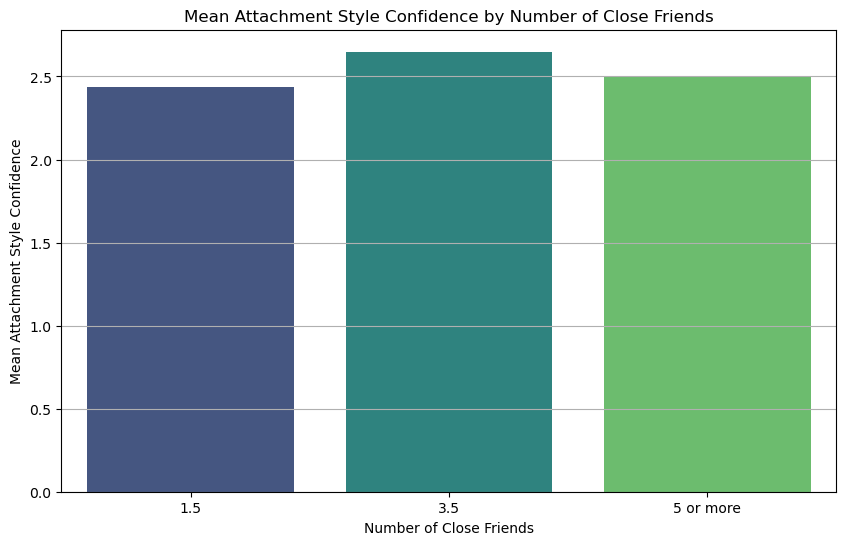

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://github.com/pointOfive/stat130chat130/blob/main/CP/CSCS_data_anon.csv?raw=true'
data = pd.read_csv(url)

# Function to convert close friends string values to numeric
def convert_close_friends(value):
    if pd.isna(value):
        return np.nan
    if 'or more' in value:
        return 5  # Assuming '5 or more' translates to 5
    elif 'Presented but no response' in value:
        return np.nan  # Treating as missing
    else:
        parts = value.split('–')
        return np.mean([int(parts[0]), int(parts[1])]) if len(parts) > 1 else int(parts[0])

# Apply the conversion function to the relevant column
data['close_friends_num'] = data['CONNECTION_social_num_close_friends_grouped'].apply(convert_close_friends)

# Mapping for attachment style questionnaire
attachment_style_map = {
    'Totally agree': 5,
    'Somewhat agree': 4,
    'Somewhat disagree': 2,
    'Totally disagree': 0,
    'Disagree': 1
}

# Convert the attachment style responses to numeric values
data['attachment_style_num'] = data['PSYCH_attachment_style_questionnaire_secure_confident'].map(attachment_style_map)

# Group by number of close friends and calculate mean and standard deviation of attachment style scores
grouped_stats = data.groupby('close_friends_num')['attachment_style_num'].agg(['mean', 'std']).reset_index()

# Replace numeric labels with string labels in the grouped stats
grouped_stats['close_friends_num'] = grouped_stats['close_friends_num'].replace({5: '5 or more'})

# Visualization of the mean attachment style confidence
plt.figure(figsize=(10, 6))
sns.barplot(x='close_friends_num', y='mean', data=grouped_stats, errorbar='sd', palette='viridis', ci=None)
plt.title('Mean Attachment Style Confidence by Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Mean Attachment Style Confidence')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()


Question 2: Do individuals who frequently rely on friends for emotional support experience lower levels of emptiness?

objective: To determine if having someone to rely on emotionally can mitigate feelings of emptiness.

variables used:
1. frequency of emotional support from friends ('I can count on my friends when things go wrong') PSYCH_zimet_multidimensional_social_support_scale_go_wrong 

Description: This variable assesses the frequency with which individuals feel they can rely on friends when things go wrong.

Suggested Visualization: Binned bar plot of emotional support levels (from "Very Low" to "Very High") against mean loneliness scores. This plot will help illustrate how varying levels of perceived social support correlate with feelings of emptiness.

2. emptiness score ('I experience a general sense of emptiness')
LONELY_dejong_emotional_social_loneliness_scale_emptiness

Description: This variable measures how frequently individuals experience a general sense of emptiness.

Suggested Visualization: The same bar plot will be used to show the mean emptiness score across different levels of emotional support, providing a visual connection between social reliance and emptiness.



Selected Method: A binned bar plot is best used to visualize the mean emptiness scores for each emotional support level. This will show the trend in loneliness across different support levels, which can provide insights into the connection between emotional reliance and feelings of emptiness.

Assumptions: each support and loneliness score category is reasonably represented in the data. binned categories meaningfully capture the levels of social support



Null Hypothesis (H0): There is no significant difference in feelings of emptiness based on the level of emotional support from friends.

Alternative Hypothesis (H1): Individuals with higher levels of emotional support from friends report significantly lower levels of emptiness, suggesting that emotional reliance on friends can reduce feelings of loneliness.

/tmp/ipykernel_117/1474030657.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_loneliness = data.groupby('support_binned')['loneliness_num'].agg(['mean', 'std']).reset_index()
/tmp/ipykernel_117/1474030657.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support_binned', y='mean', data=grouped_loneliness, errorbar='sd', palette='viridis')


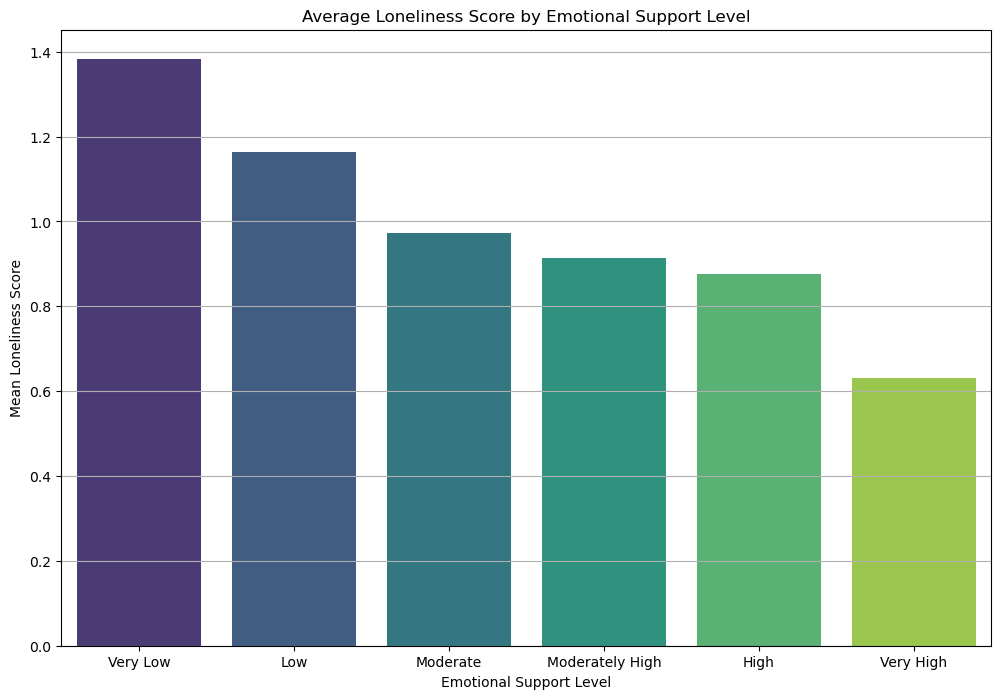

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://github.com/pointOfive/stat130chat130/blob/main/CP/CSCS_data_anon.csv?raw=true'
data = pd.read_csv(url, low_memory=False)

# Mapping for emotional support scale
support_map = {
    'Very Strongly Agree': 5,
    'Strongly Agree': 4,
    'Agree': 3,
    'Neither Agree Nor Disagree': 2,
    'Disagree': 1,
    'Strongly Disagree': 0,
    'Very Strongly Disagree': -1
}

# Map the emotional support responses to numeric values
data['social_support_num'] = data['PSYCH_zimet_multidimensional_social_support_scale_go_wrong'].map(support_map)

# Mapping for loneliness scale
loneliness_map = {
    'No': 0,
    'More or less': 1,
    'Yes': 2
}

# Map the loneliness responses to numeric values
data['loneliness_num'] = data['LONELY_dejong_emotional_social_loneliness_scale_emptiness'].map(loneliness_map)

# Drop rows where either 'social_support_num' or 'loneliness_num' is missing
data = data.dropna(subset=['social_support_num', 'loneliness_num'])

# Define bins for social support scores to create smaller groups
bins = [-1, 0, 1, 2, 3, 4, 5]
labels = ['Very Low', 'Low', 'Moderate', 'Moderately High', 'High', 'Very High']

# Create a binned category for social support
data['support_binned'] = pd.cut(data['social_support_num'], bins=bins, labels=labels, include_lowest=True)

# Group by the binned support levels and calculate the mean and standard deviation of loneliness
grouped_loneliness = data.groupby('support_binned')['loneliness_num'].agg(['mean', 'std']).reset_index()

# Plot the bar plot with error bars representing the standard deviation
plt.figure(figsize=(12, 8))
sns.barplot(x='support_binned', y='mean', data=grouped_loneliness, errorbar='sd', palette='viridis')
plt.title('Average Loneliness Score by Emotional Support Level')
plt.xlabel('Emotional Support Level')
plt.ylabel('Mean Loneliness Score')
plt.grid(axis='y')

# Show the plot
plt.show()


Question 3: What is the relationship between having a special person to share joys and sorrows with and satisfaction with the number of friends?

Objective: To examine if individuals are more likely to feel satisfied with the number of friends they have when they have someone special with whom they can share significant emotional experiences.

variables used: 
1. PSYCH_zimet_multidimensional_social_support_scale_joys - 'There is a special person with whom I can share my joys and sorrows' 

Description: This variable indicates whether an individual has a special person with whom they can share their personal joys and sorrows. It is a measure of perceived emotional support.

Suggested Visualization: A bar plot showing the proportion of satisfaction responses (satisfied vs. not satisfied) for different levels of agreement on having a special person to share with. This can help visualize whether individuals with a strong support system are more satisfied with their social circle.

2. CONNECTION_satisfied_num_friends - 'Are you satisfied with the number of friends you have now?' (either Yes or No)

Description: This variable reflects whether an individual is satisfied with the current number of friends they have, with responses recorded as "Yes" or "No."

Suggested Visualization: The same bar plot will be used to display the frequency of "Yes" and "No" responses across different levels of perceived support.



Selected Method: A bar plot will show satisfaction rates with the number of friends for individuals with varying levels of agreement on having a special person to share joys and sorrows. This approach can reveal patterns in the association between perceived support and social satisfaction.

Assumptions: Assumes a meaningful distribution of responses across both variables, and that agreement levels on having a special person (emotional support) can reasonably predict satisfaction with one’s social circle.



Null Hypothesis (H0): There is no significant relationship between having a special person to share joys and sorrows with and satisfaction with the number of friends.

Alternative Hypothesis (H1): Individuals with a special person to share joys and sorrows are more likely to be satisfied with the number of friends they have, indicating that emotional support may contribute to social satisfaction.

Counts of NaN values in 'satisfied_num_friends_binary': 8344
Counts of NaN values in 'joys_support_num': 7764
Grouped satisfaction data:
    joys_support_num  satisfied_num_friends_binary
0              -1.0                      0.264368
1               0.0                      0.369231
2               1.0                      0.442478
3               2.0                      0.557647
4               3.0                      0.596571
5               4.0                      0.577132
6               5.0                      0.713826


/tmp/ipykernel_89/1808754830.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='joys_support_num', y='satisfied_num_friends_binary', data=grouped_satisfaction, palette='viridis')


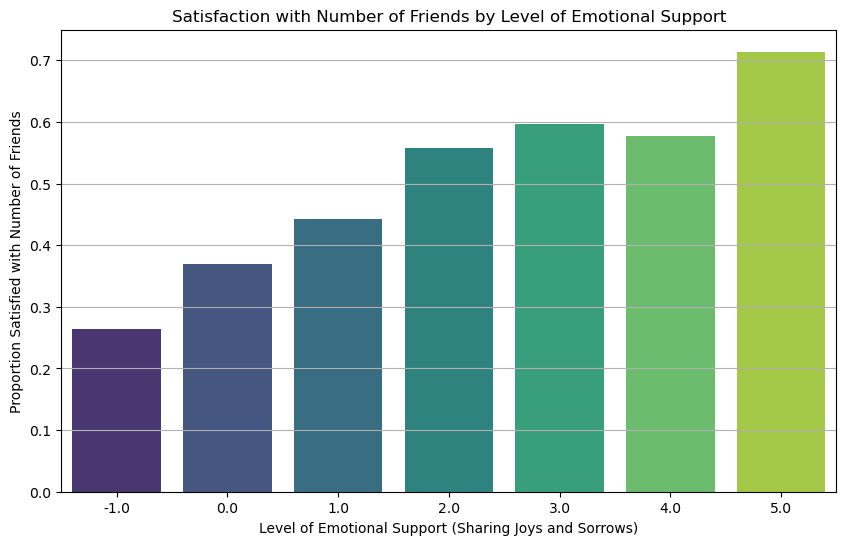

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://github.com/pointOfive/stat130chat130/blob/main/CP/CSCS_data_anon.csv?raw=true'
data = pd.read_csv(url, low_memory=False)

# Mapping for emotional support scale
support_map = {
    'Very Strongly Agree': 5,
    'Strongly Agree': 4,
    'Agree': 3,
    'Neither Agree Nor Disagree': 2,
    'Disagree': 1,
    'Strongly Disagree': 0,
    'Very Strongly Disagree': -1
}

# Convert emotional support responses to numeric values
data['joys_support_num'] = data['PSYCH_zimet_multidimensional_social_support_scale_joys'].map(support_map)

# Refine mapping for satisfaction responses
satisfaction_map = {
    'Yes': 1,
    'No, I want to have MORE friends.': 0,
    'No, I want to have FEWER friends.': 0,
    'Presented but no response': None
}

# Apply the refined mapping to create binary satisfaction variable
data['satisfied_num_friends_binary'] = data['CONNECTION_satisfied_num_friends'].map(satisfaction_map)

# Check for NaN values after mapping
print("Counts of NaN values in 'satisfied_num_friends_binary':", data['satisfied_num_friends_binary'].isna().sum())
print("Counts of NaN values in 'joys_support_num':", data['joys_support_num'].isna().sum())

# Drop rows where either 'joys_support_num' or 'satisfied_num_friends_binary' is missing
data = data.dropna(subset=['joys_support_num', 'satisfied_num_friends_binary'])

# Group data by emotional support levels and calculate satisfaction rates
grouped_satisfaction = data.groupby('joys_support_num')['satisfied_num_friends_binary'].mean().reset_index()

# Check the grouped data to understand the mean satisfaction per level
print("Grouped satisfaction data:\n", grouped_satisfaction)

# Plot satisfaction rates across different emotional support levels
plt.figure(figsize=(10, 6))
sns.barplot(x='joys_support_num', y='satisfied_num_friends_binary', data=grouped_satisfaction, palette='viridis')
plt.title('Satisfaction with Number of Friends by Level of Emotional Support')
plt.xlabel('Level of Emotional Support (Sharing Joys and Sorrows)')
plt.ylabel('Proportion Satisfied with Number of Friends')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()
